In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.spatial.distance as distance
%matplotlib inline

/Users/johnsnyder/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# Comparing Drum Rhythms as Vectors, part deux: Approach for comparing drum set patterns

This notebook is the second installment of a  ¯\_(ツ)_/¯-part series on comparing drum rhythms mathematically.

Since my last post, I've begun considering approaches for comparing multi-instrument rhythms. Since a drumset can feature anywhere from 1 to len(Neil_Peart_drum_set), the majority of songs will feature a multiple rhythms that make up the percussion of a song.

For example, let's look back at the drum machine example from last time:
![Drum Machine](http://www.apfelmagazine.de/wp-content/uploads/dm1-the-drum-machine-3.jpg)

This contains four layers of rhythms: Kick, Snare, Hihat (closed), and Rimshot. Each of these can be split out into its own one-dimensional vector, shown in the matrix below:

In [2]:
# Create dictionary of drum parts
DM1_pattern = {'Time':['1','1e','1&','1a','2','2e','2&','2a','3','3e','3&','3a','4','4e','4&','4a'],
         'Kick':[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0],
        'Snare':[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        'HHClosed':[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
        'Rimshot':[1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]}
# Transform dictionary into dataframe
DM1_pattern_df = pd.DataFrame(DM1_pattern, index=DM1_pattern['Time'],
                              columns=['Kick','Snare','HHClosed','Rimshot']).ix[:,:4].T

DM1_pattern_df

,1,1e,1&,1a,2,2e,2&,2a,3,3e,3&,3a,4,4e,4&,4a
Kick,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0
Snare,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
HHClosed,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
Rimshot,1,0,1,1,0,1,0,1,0,0,1,0,0,0,1,0


# Methodology for comparing multi-vector rhythms

In order to compare the above rhythm with another one, I will calculate the Euclidean distance of each drumset component's rhythm between the same component in the second rhythm. In otherwords, compare the distance between the two kick vectors, the snare vectors, hihat vectors, etc. Once these distances are found, take the average of those numbers to obtain an overall distance between pattern 1 and pattern 2.

In order to see this in practice, let's compare the above pattern with another one, below.

In [3]:
# Create dictionary of drum parts
DM1_pattern = {'Time':['1','1e','1&','1a','2','2e','2&','2a','3','3e','3&','3a','4','4e','4&','4a'],
         'Kick':[1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0],
        'Snare':[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        'HHClosed':[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
        'Rimshot':[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]}
# Transform dictionary into dataframe
DM1_pattern_df2 = pd.DataFrame(DM1_pattern, index=DM1_pattern['Time'],
                              columns=['Kick','Snare','HHClosed','Rimshot']).ix[:,:4].T

DM1_pattern_df2

,1,1e,1&,1a,2,2e,2&,2a,3,3e,3&,3a,4,4e,4&,4a
Kick,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
Snare,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
HHClosed,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1
Rimshot,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0


We can visualize these rhythm dataframes, similar to what we did in the first workbook:

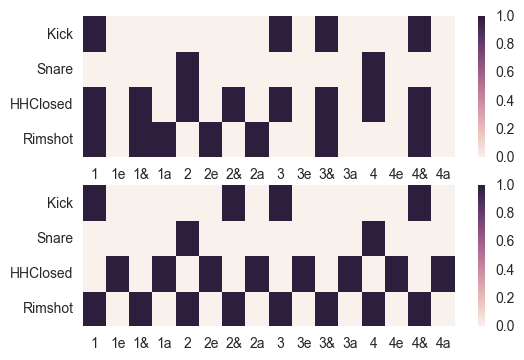

In [4]:
fig = plt.figure()

# sp1 - rhythm 1
sub1 = plt.subplot(211)
sns.heatmap(DM1_pattern_df)

# sp2 - rhythm 2
sub2 = plt.subplot(212)
sns.heatmap(DM1_pattern_df2)

plt.show()

In [5]:
example1_dist = {}
for i,j in zip(DM1_pattern_df.index, range(len(DM1_pattern_df.index))):
    example1_dist["{}".format(i)]=distance.euclidean(DM1_pattern_df.ix[j,:],DM1_pattern_df2.ix[j,:])
example1_dist

{'HHClosed': 4.0,
 'Kick': 1.4142135623730951,
 'Rimshot': 2.6457513110645907,
 'Snare': 0.0}

In [6]:
print 'Distance between Pattern 1 and Pattern 2: {:2f}'.format(np.mean(example1_dist.values()))

Distance between Pattern 1 and Pattern 2: 2.014991


The above example tells us a few things:

- The hihat patterns have a maximum distance, 4.0, from each each, since none of the hits line up. Played against each other, the hihat patterns are akin to playing a single-stroke roll alternating between right and left hands.

- The snare patterns have a minimum distance, 0.0, from each other, because, well, it's the same pattern!

- The kick and rimshot patterns have some overlap to different extents, as we can visualize in the graphs above.

All in all, when we take the average of these values, we achieve a similarity rating of 2.015.


### Potential issues with this approach to explore

There are a couple issues with this approach that I'll need to figure out eventually.

**1. Different instruments in a rhythm** The most apparent one coming to mind being how to deal with drum patterns that feature different instruments (pattern 1 has 8th notes on the ride cymbal, pattern 2 has 8th notes on the hihat... how different are they in reality?).

**2. A "core" set of instruments to the beat?** There may be reason to weight some elements of the drum set higher than others. For example, the kick and snare parts of the beat are often most important, with other elements of the kit then supporting those sections. If two beats have the same kick and snare parts but different supporting sections, how different are they? I see arguments in both directions, and this may be a contextual question (i.e., what are the other instruments doing? What are the driving forces/instruments behind the drums' rhythm?).

**3. How to treat ghost notes.** A ghost note is a musical note with a rhythmic value, but no discernible pitch when played. They're in most rock, R&B, blues, and hip hop songs you'll hear on the radio (plus many other genres as well). Ghost notes are usually played on the snare drum and provide texture to a beat. However, I would not classify these as full-blown snare hits. Rather, they're either a "quarter" of a hit or perhaps a different layer of the rhythm altogether.

**4. Feel versus rhythm.** My drum teacher frequently told me that the best drummers are those who can play the same rhythm in two different ways. My approach in its current form doesn't quantify "feel." I'll explore this in the future, but for now, I'll try not to analyze anything recorded by Bernard Purdie.

I'll look into questions 3 and 4 next time.